In [4]:
import surprise
data = surprise.Dataset.load_builtin('ml-100k')

In [6]:
import pandas as pd
df = pd.DataFrame(data.raw_ratings, columns=["user","item","rate","id"])
del df["id"]
df.head()

,user,item,rate
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0


In [7]:
df_table = df.set_index(["user","item"]).unstack()
df_table.shape

(943, 1682)

In [8]:
df_table.iloc[212:222,808:817].fillna("")

rate                                
item  211 212 213 214 215 216 217 218 219
user                                     
290     3                   4       2    
291         4       4   4           4   4
292                 3                    
293     4       3       4   4   3   2    
294                                      
295             5       5   5   4   5    
296     4                                
297     4       3       2   4       3    
298     5       3       5                
299     4   4   5           5

Text(0.5, 1.0, 'Rate Matrix')

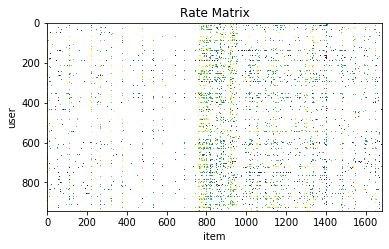

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(df_table)
plt.grid(False)
plt.xlabel("item")
plt.ylabel("user")
plt.title("Rate Matrix")

In [15]:
from surprise.model_selection import KFold
import numpy as np

bsl_option = {
    'method' : 'als',
    'n_epochs': 5,
    'reg_u': 12,
    'reg_i': 5
}

algo = surprise.BaselineOnly(bsl_option)

np.random.seed(10)
acc = np.zeros(5)
cv = KFold(5)
for i, (trainset, testset) in enumerate(cv.split(data)):
    algo.fit(trainset)
    prediction = algo.test(testset)
    acc[i] = surprise.accuracy.rmse(prediction, verbose=True)
acc.mean()

Estimating biases using als...
RMSE: 0.9476
Estimating biases using als...
RMSE: 0.9394
Estimating biases using als...
RMSE: 0.9466
Estimating biases using als...
RMSE: 0.9383
Estimating biases using als...
RMSE: 0.9341


0.941182142408484

In [16]:
from surprise.model_selection import cross_validate

cross_validate(algo,data)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([0.94475572, 0.94021554, 0.94049481, 0.9344386 , 0.94491933]),
 'test_mae': array([0.74789936, 0.74546396, 0.74477578, 0.74117025, 0.74779877]),
 'fit_time': (0.17453336715698242,
  0.14467215538024902,
  0.21642160415649414,
  0.20644831657409668,
  0.22639679908752441),
 'test_time': (0.21642112731933594,
  0.21038198471069336,
  0.2743854522705078,
  0.21245145797729492,
  0.4258615970611572)}

In [24]:
sim_option = {'name':'msd'}
algo = surprise.KNNBasic(sim_options=sim_option)
cross_validate(algo, data)["test_mae"].mean()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


0.7726677232915226

In [25]:
sim_option = {'name': 'pearson_baseline'}
algo = surprise.KNNBaseline(sim_options = sim_option)
cross_validate(algo, data)["test_mae"].mean()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


0.7207490092712792

In [26]:
%%time
algo = surprise.SVD(n_factors=100)
cross_validate(algo, data)["test_mae"].mean()

Wall time: 43.9 s


0.737430544430107

In [ ]:
%%time
algo = surprise.NMF(n_factors=100)
cross_validate(algo, data)["test_mae"].mean()
#1시간 넘게 걸림